In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:\Windows\Fonts/segoeui.ttf"

font_text= fm.FontProperties(fname=font_path,size=24,weight = 'bold')

font_labels = fm.FontProperties(fname=font_path,size=16,weight = 'bold')
font_ticks = fm.FontProperties(fname=font_path,size=14)

c= ['#02DAA2','#00b3fe','#0E8BB3','#120458'][::-1]



#font2 = fm.FontProperties(fname='C:\Windows\Fonts/NanumSquareOTF_acR.otf',size=14)

In [2]:
def reaction_pathway_with_barrier(step_list,ylim,c,lab,barrier=False) : # barrier = [[step_list,Ea_list],[step_list,Ea_list]], 일부만 넣으려면 False?
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    
    for i in range(len(step_list)) :
        
        rc = np.arange(len(step_list[i]) * 2)
        data = {'rc' : rc}
        df = pd.DataFrame(data)
        dash = list()
        #print(step_list)
        for j in range(len(step_list[i])) :
            df['s'+str(j)] = np.nan
            df['s'+str(j)][2*j] = step_list[i][j]
            df['s'+str(j)][2*j+1] = step_list[i][j]
            dash.append(step_list[i][j])
            dash.append(step_list[i][j])

        df['dash'] = dash    
        
        ax.plot([0,1],[0,0],color = c[i],label = lab[i])

        ax.plot(df.loc[:, 's0':'s'+str(len(step_list[i])-1)],color = c[i])
        
        
        # 1 3 5 7 --> 1 2 3 4
        for k in range(1,len(df.index)-1,2) :
            check_dash = True
            if barrier != False :
                for l in range(len(barrier[i][0])) :
                    if barrier[i][0][l] == k//2 + 1 :
                        
                        x1 = np.arange(0,np.pi/2,0.01)
                        y1 = barrier[i][1][l] * np.sin(x1)

                        x1_set = x1/(np.pi/2) * 0.5 + k
                        y1_set = y1 + dash[k]

                        x2 = np.arange(np.pi/2,np.pi,0.01)
                        y2 = (barrier[i][1][l]-(dash[k+1]-dash[k])) * np.sin(x2)

                        x2_set = (x2-(np.pi/2))/(np.pi/2) * 0.5 + k+0.5
                        y2_set = y2 +dash[k+1]

                        ax.plot(x1_set,y1_set,c[i])
                        ax.plot(x2_set,y2_set,c[i])

                        check_dash = False
                        
                        

                if check_dash == True :
                    ax.plot([k,k+1],[dash[k],dash[k+1]],c[i],linestyle = 'dashed')
                        
                
            if barrier == False :
                for k in range(1,len(df.index)-1,2) :
                    ax.plot([k,k+1],[dash[k],dash[k+1]],c[i],linestyle = 'dashed')
    
    #plt.plot(df.index,df[ 'dash' ],c,linestyle = 'dashed')
    
    plt.xticks([])
    plt.yticks(fontproperties=font_ticks)
    ax.set_ylim(ylim)
    
    ax.set_xlabel('Reaction coordinates', fontproperties=font_labels)
    ax.set_ylabel('Relative energy (eV)', fontproperties=font_labels)
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.legend(prop={'family':font_name, 'size':14})
    
    return df

<ipython-input-2-497cd6459c99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(j)][2*j] = step_list[i][j]
<ipython-input-2-497cd6459c99>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(j)][2*j+1] = step_list[i][j]
<ipython-input-2-497cd6459c99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(j)][2*j] = step_list[i][j]
<ipython-input-2-497cd6459c99>:15: SettingWithCopyWarning: 
A value is trying to

,rc,s0,s1,s2,s3,s4,dash
0,0,0.0,NaN,NaN,NaN,NaN,0.00
1,1,0.0,NaN,NaN,NaN,NaN,0.00
2,2,NaN,1.0,NaN,NaN,NaN,1.00
3,3,NaN,1.0,NaN,NaN,NaN,1.00
4,4,NaN,NaN,2.36,NaN,NaN,2.36
5,5,NaN,NaN,2.36,NaN,NaN,2.36
6,6,NaN,NaN,NaN,3.89,NaN,3.89
7,7,NaN,NaN,NaN,3.89,NaN,3.89
8,8,NaN,NaN,NaN,NaN,4.92,4.92
9,9,NaN,NaN,NaN,NaN,4.92,4.92


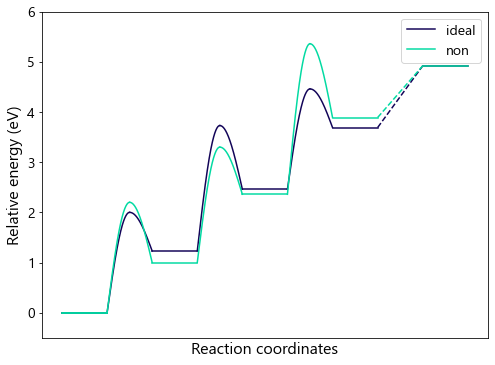

In [3]:
path1 = [0,1.23,1.23*2,1.23*3,1.23*4]
path2 = [0,1.00,1.23*2-0.1,1.23*3+0.2,1.23*4]

color = [c[0],c[3]]

lim = (-0.5,6)

label = ['ideal','non']

barrier1 = [[1,2,3], [2,2.5,2] ]
barrier2 = [[1,2,3], [2.2,2.3,3] ]

reaction_pathway_with_barrier([path1,path2],lim,color,label,[barrier1,barrier2])

<ipython-input-2-497cd6459c99>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(j)][2*j] = step_list[i][j]
<ipython-input-2-497cd6459c99>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(j)][2*j+1] = step_list[i][j]


,rc,s0,s1,s2,s3,s4,dash
0,0,0.0,NaN,NaN,NaN,NaN,0.00
1,1,0.0,NaN,NaN,NaN,NaN,0.00
2,2,NaN,1.0,NaN,NaN,NaN,1.00
3,3,NaN,1.0,NaN,NaN,NaN,1.00
4,4,NaN,NaN,2.36,NaN,NaN,2.36
5,5,NaN,NaN,2.36,NaN,NaN,2.36
6,6,NaN,NaN,NaN,3.89,NaN,3.89
7,7,NaN,NaN,NaN,3.89,NaN,3.89
8,8,NaN,NaN,NaN,NaN,4.92,4.92
9,9,NaN,NaN,NaN,NaN,4.92,4.92


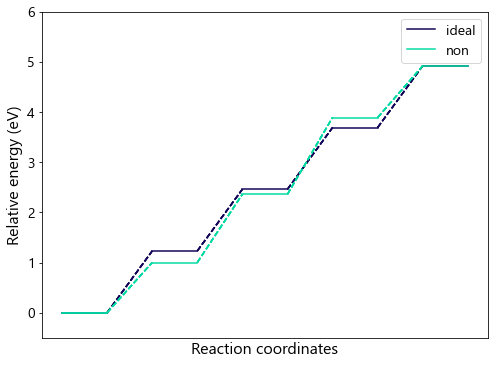

In [4]:
reaction_pathway_with_barrier([path1,path2],lim,color,label)